![Code First: Girls](images/logo_large.png)

#### Python Session 6

# Part 2: Introduction to numpy & more matplotlib

Download files from google drive:
‘book_analysis_code.py’ and ‘book_dataset.csv’

All work will be done in the ‘book_analysis_code.py’ file.

### What are numpy arrays?

Numpy arrays are often faster than lists for doing mathematical operations. 
It is easy to perform addition, subtraction, multiplication, divisions and more complex mathematical operations using numpy arrays.

#### Our first numpy array

In [1]:
import numpy as np # np can be used as a shorthand

my_first_array = np.array((1, 2, 3))

print(my_first_array)

[1 2 3]


Numpy arrays can be used to perform mathematical operations

In [2]:
array_one = np.array((1, 2, 3))

print(array_one)

[1 2 3]


Add 5 to each number in the array

In [3]:
array_one += 5 # This means: array_one = array_one + 5

print(array_one)

[6 7 8]


Multiply each number in the array by 10

In [4]:
array_one *= 10 # This means: array_one = array_one * 10

print(array_one)

[60 70 80]


##### They can be indexed just like lists

In [5]:
array_one = np.array((9, 4, 3))

# First element
print(array_one[0])


# Last element
print(array_one[-1])


# Get first two elements
print(array_one[: 2])


9
3
[9 4]


You can also make arrays of ones:

In [6]:
ones_array = np.ones(10)

print(ones_array)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


And zeros:

In [7]:
zeros_array = np.zeros(10)

print(zeros_array)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


You can perform lots of functions with them

Such as finding the sum:

In [8]:
array_one = np.array((1, 2, 3))

array_sum = np.sum(array_one)
print(array_sum)

6


Or the mean:

In [9]:
array_one = np.array((1, 2, 3))

array_mean = np.mean(array_one)
print(array_mean)

2.0


You can easily peform operations on multiple lists, such as adding them together:

In [10]:
array_one = np.array((1, 2, 3))

array_two = np.array((1, 6, 8))

add_array = array_one + array_two
print(add_array)

[ 2  8 11]


Or multiplying them:

In [11]:
array_one = np.array((1, 2, 3))

array_two = np.array((1, 6, 8))

multiply_array = array_one*array_two
print(multiply_array)

[ 1 12 24]


#### Back to our data: How do we calculate the value of our current stock?

- Multiply the number of copies of each book by price of the book:

Calculate Num_copies_stock * Price for each book.

![Code First: Girls](images/data_pic/book_dataset.png)

What is one way of solving this?

1. Extract array of Num_copies_stock
1. Extract array of prices
1. Multiply the arrays Num_copies_stock and prices together
1. Sum the result to find the total stock value

#### Extracting number of copies of each book

In [12]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# Open the dataset
with open('book_dataset.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)

    # read the headers of the csv
    headers = reader.fieldnames

    # create list to store the book data
    book_data = []

    # add book data dictionaries to list from .csv
    for row in reader:
        book_data.append(row)

In [13]:
num_stock = np.array(()) # create an empty array

for book in book_data:
    num_stock = np.append(num_stock,int(book['Num_copies_stock'])) # remember to convert to integer
    
print(num_stock)

[ 3.  2.  3.  3.  7.  3. 18. 22. 12.  2.  5.  8.  5.  4.  4.  8.  2.  3.
  2.  1. 15.  7.  1.  6.]


**Exercise 2:** Complete the task of calculating the value of our stock:

1. Extract array of num_stock 
1. Extract array of prices
1. Multiply the arrays num_stock and prices together
1. Sum the result to find the total stock value
1. Print the stock value

Solution

In [14]:
num_stock = np.array(())  # Create empty array for number of copies
stock_price = np.array(()) # Create empty array for stock prices

for book in book_data:
    num_stock = np.append(num_stock,int(book['Num_copies_stock'])) # remember to convert to integer
    stock_price = np.append(stock_price,float(book['Price'])) # remember to use 'float' as prices have decimals

print('Num stock: ', num_stock)
print('Stock prices: ', stock_price)

stock_value = np.sum(num_stock*stock_price) # Calculate the stock value

print('The value of the stock is £{}'.format(stock_value))

Num stock:  [ 3.  2.  3.  3.  7.  3. 18. 22. 12.  2.  5.  8.  5.  4.  4.  8.  2.  3.
  2.  1. 15.  7.  1.  6.]
Stock prices:  [6.32 3.45 3.73 6.78 5.5  4.75 6.27 6.23 5.21 1.99 3.67 5.99 2.99 4.99
 1.98 3.99 5.17 2.45 6.8  3.14 4.92 5.27 2.93 5.37]
The value of the stock is £747.85


#### Next Question: How much revenue did we make each month?
Calculate price * copies sold for each month per book.

Sum up the total revenue per month. 

![Code First: Girls](images/data_pic/book_dataset.png)

#### Method one: Extract all the arrays, then do the calculation

In [15]:
stock_price = np.array(()) 
jan_sales = np.array(())
feb_sales = np.array(())
march_sales = np.array(())

for book in book_data:
    stock_price = np.append(stock_price,float(book['Price']))
    jan_sales = np.append(jan_sales,int(book['Jan']))
    feb_sales = np.append(feb_sales,int(book['Feb']))    
    march_sales = np.append(march_sales,int(book['March']))   

jan_rev = np.sum(jan_sales*stock_price)
print(jan_rev)

feb_rev = np.sum(feb_sales*stock_price)
print(feb_rev)

march_rev = np.sum(march_sales*stock_price)
print(march_rev)

2405.55
1201.48
1912.6


Problem: Lots of repetition

#### Method two: Calculate all the sales in the loop

In [16]:
jan_sales = np.array(())
feb_sales = np.array(())
march_sales = np.array(())

for book in book_data:
    jan_sales = np.append(jan_sales, float(book['Price']) * int(book['Jan']))
    feb_sales = np.append(feb_sales, float(book['Price']) * int(book['Feb']))
    march_sales = np.append(march_sales, float(book['Price']) * int(book['March']))   

jan_rev = np.sum(jan_sales)
feb_rev = np.sum(feb_sales)
march_rev = np.sum(march_sales)

print(jan_rev)
print(feb_rev)
print(march_rev)

2405.55
1201.48
1912.6


Problem: Still lots of repetition

#### Method three: One for-loop

In [17]:
revenue_months = np.zeros(6) # Pre-allocate an empty array to store the data

for book in book_data:
    revenue_months[0] += float(book['Price']) * int(book['Jan'])
    revenue_months[1] += float(book['Price']) * int(book['Feb'])
    revenue_months[2] += float(book['Price']) * int(book['March'])
    revenue_months[3] += float(book['Price']) * int(book['April'])
    revenue_months[4] += float(book['Price']) * int(book['May'])
    revenue_months[5] += float(book['Price']) * int(book['Jun'])
    
print(revenue_months)

[2405.55 1201.48 1912.6   847.54 1198.12 1650.62]


Much better! But: Is there a way to remove the repetition in the loop?

#### Another solution: Use a nested for-loop
Nested for-loops are for-loops within another for-loop.

In [18]:
revenue_months = np.zeros(6)

months = headers[4:] # create list with month names in from the .csv headers
print(months)

for book in book_data:
    for index in range(len(months)):
        revenue_months[index] += float(book['Price']) * int(book[months[index]])
        
print(revenue_months)

['Jan', 'Feb', 'March', 'April', 'May', 'Jun']
[2405.55 1201.48 1912.6   847.54 1198.12 1650.62]


What is going on here?

In [19]:
revenue_months = np.zeros(6)

print(revenue_months)
print()

for book in book_data:
    
    for index in range(len(months)):
        
        print('Book: {}, Loop: {}'.format(book['Book'], index))
        
        print('Month: ' + months[index])
        
        print('Price: ' + (book['Price']))
        
        print('Copies sold: '+ (book[months[index]]))
        
        print('Month revenue: {}'.format(float(book['Price']) * int(book[months[index]])))
        
        revenue_months[index] += float(book['Price']) * int(book[months[index]])
        
        print('Monthly revenue running total: {}'.format(revenue_months))
        print()
        
    break

[0. 0. 0. 0. 0. 0.]

Book: Blue Moon, Loop: 0
Month: Jan
Price: 6.32
Copies sold: 33
Month revenue: 208.56
Monthly revenue running total: [208.56   0.     0.     0.     0.     0.  ]

Book: Blue Moon, Loop: 1
Month: Feb
Price: 6.32
Copies sold: 14
Month revenue: 88.48
Monthly revenue running total: [208.56  88.48   0.     0.     0.     0.  ]

Book: Blue Moon, Loop: 2
Month: March
Price: 6.32
Copies sold: 4
Month revenue: 25.28
Monthly revenue running total: [208.56  88.48  25.28   0.     0.     0.  ]

Book: Blue Moon, Loop: 3
Month: April
Price: 6.32
Copies sold: 10
Month revenue: 63.2
Monthly revenue running total: [208.56  88.48  25.28  63.2    0.     0.  ]

Book: Blue Moon, Loop: 4
Month: May
Price: 6.32
Copies sold: 15
Month revenue: 94.80000000000001
Monthly revenue running total: [208.56  88.48  25.28  63.2   94.8    0.  ]

Book: Blue Moon, Loop: 5
Month: Jun
Price: 6.32
Copies sold: 18
Month revenue: 113.76
Monthly revenue running total: [208.56  88.48  25.28  63.2   94.8  113.76

![Code First: Girls](images/data_pic/book_dataset.png)

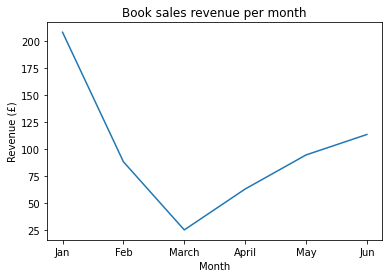

In [20]:
plt.figure()
plt.plot(months, revenue_months)
plt.ylabel('Revenue (£)')
plt.xlabel('Month')
plt.title('Book sales revenue per month')
plt.savefig('Book_sales.png')
plt.show()

**Exercise 3a:** Calculate how much money we made from selling Children's books each month

**Exercise 3b:**  Plot the result using a suitable chart with matplotlib.

Exercise 3a solution

In [21]:
revenue_months_children = np.zeros(6)

months = headers[4:] # create list with month names in from the .csv headers
print(months)

for book in book_data:
    for index in range(len(months)):
        if book['Genre'] == 'Children':
            revenue_months_children[index] += float(book['Price']) * int(book[months[index]])
        
print(revenue_months_children)

['Jan', 'Feb', 'March', 'April', 'May', 'Jun']
[477.45 337.54 403.61 216.92 277.08 398.02]


Exercise 3b solution

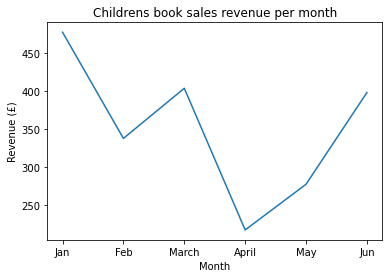

In [22]:
plt.figure()
plt.plot(months, revenue_months_children)
plt.ylabel('Revenue (£)')
plt.xlabel('Month')
plt.title('Childrens book sales revenue per month')
plt.savefig('Childrens_Book_sales.png')
plt.show()